In [ ]:
# import os
# import cv2
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split

# # Paths
# image_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Classic"
# mask_output_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\mask"

# os.makedirs(mask_output_dir, exist_ok=True)

# # Parameters
# IMG_HEIGHT = 128
# IMG_WIDTH = 128

# # Function to generate masks
# def generate_masks(image_dir, mask_output_dir):
#     for filename in os.listdir(image_dir):
#         # Load the image
#         img_path = os.path.join(image_dir, filename)
#         img = cv2.imread(img_path)
#         if img is None:
#             continue
        
#         # Convert to grayscale
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
#         # Apply thresholding to create a binary mask
#         _, mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

#         # Optionally resize mask to standard size
#         mask = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))

#         # Save the generated mask
#         mask_filename = os.path.join(mask_output_dir, f"{os.path.splitext(filename)[0]}_mask.png")
#         cv2.imwrite(mask_filename, mask)

# # Generate masks
# generate_masks(image_dir, mask_output_dir)


In [ ]:
# import tensorflow as tf
# import cv2
# import numpy as np
# import os
# from tensorflow.keras.applications import mobilenet_v2

# # Load the pretrained DeepLabV3 model
# model = tf.keras.applications.DenseNet121(
#     weights="imagenet", include_top=False, input_shape=(224, 224, 3)
# )

# # Paths
# image_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Classic"
# mask_output_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\mask_predic"

# os.makedirs(mask_output_dir, exist_ok=True)

# # Generate masks
# for filename in os.listdir(image_dir):
#     img_path = os.path.join(image_dir, filename)
#     img = cv2.imread(img_path)
#     if img is None:
#         continue

#     # Preprocess image
#     img_resized = cv2.resize(img, (224, 224))
#     img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_resized)
#     img_array = np.expand_dims(img_array, axis=0)

#     # Predict mask
#     pred = model.predict(img_array)[0]
#     mask = np.argmax(pred, axis=-1)  # Get class with the highest probability

#     # Save mask
#     mask_resized = cv2.resize(mask.astype(np.uint8), (img.shape[1], img.shape[0]))
#     mask_filename = os.path.join(mask_output_dir, f"{os.path.splitext(filename)[0]}_mask.png")
#     cv2.imwrite(mask_filename, mask_resized * 255)  # Scale to 0-255 for visualization


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
# import os
# import cv2
# import numpy as np

# # Paths to the input images and output masks
# image_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Classic"
# mask_output_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\mask"

# # Create output directory if it doesn't exist
# os.makedirs(mask_output_dir, exist_ok=True)

# # Parameters for resizing images
# IMG_HEIGHT = 512  # Height of the resized mask
# IMG_WIDTH = 512   # Width of the resized mask

# def generate_masks(image_dir, mask_output_dir):
#     """
#     Generate binary masks for images in the specified directory and save them as PNG files.
#     """
#     for filename in os.listdir(image_dir):
#         img_path = os.path.join(image_dir, filename)
        
#         # Read the image
#         img = cv2.imread(img_path)
#         if img is None:
#             print(f"Skipping invalid image: {filename}")
#             continue

#         # Convert the image to grayscale
#         gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
#         # Apply thresholding to create a binary mask
#         _, mask = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

#         # Resize the mask to standard dimensions
#         mask_resized = cv2.resize(mask, (IMG_WIDTH, IMG_HEIGHT))

#         # Save the generated mask
#         mask_filename = os.path.splitext(filename)[0] + "_mask.png"
#         mask_path = os.path.join(mask_output_dir, mask_filename)
#         cv2.imwrite(mask_path, mask_resized)

#         print(f"Generated mask saved at: {mask_path}")

# # Run the mask generation process
# generate_masks(image_dir, mask_output_dir)

# print("Mask generation completed!")


Generated mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\019d2669aceeb48cabffaedecee8b9bd_mask.png
Generated mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\0239a424aeaf329a4a2d2def5b3494b2_mask.png
Generated mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\0bfde992c25d5e7b22fbe30e4df3ef17_mask.png
Generated mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\0e2acae667e954415bafc6efff0ae1d8_mask.png
Generated mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\12fcfb41691a143ae38579c82bf7b597_mask.png
Generated mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\134067d3be21d7415572107486213d46_mask.png
Generated mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\13520ec1dc67d6a89bb0ded4996dc0db_mask.png
Generated mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\2275f2dc500b3a2cb0e19f3bec58cd24_mask.png
Generated mask saved at:

Generated grayscale mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\019d2669aceeb48cabffaedecee8b9bd_gray_mask.png
Generated grayscale mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\0239a424aeaf329a4a2d2def5b3494b2_gray_mask.png
Generated grayscale mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\0bfde992c25d5e7b22fbe30e4df3ef17_gray_mask.png
Generated grayscale mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\0e2acae667e954415bafc6efff0ae1d8_gray_mask.png
Generated grayscale mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\12fcfb41691a143ae38579c82bf7b597_gray_mask.png
Generated grayscale mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\134067d3be21d7415572107486213d46_gray_mask.png
Generated grayscale mask saved at: D:\Real Estate\House_Style_Project\House_style_ML\mask\13520ec1dc67d6a89bb0ded4996dc0db_gray_mask.png
Generated grayscale mask saved at: D:\Rea

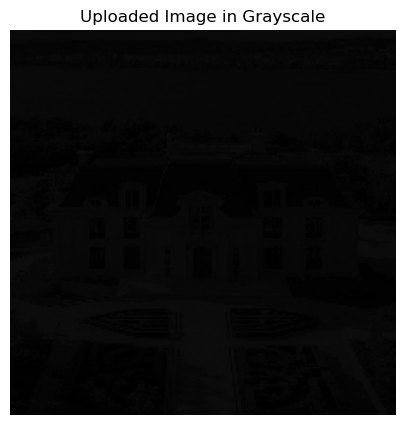

: 

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt


# Paths to the input images and output masks
image_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Classic"
mask_output_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\mask"

# Create output directory if it doesn't exist
os.makedirs(mask_output_dir, exist_ok=True)

# Parameters for resizing images (optional)
IMG_HEIGHT = 224  # Adjust as needed
IMG_WIDTH = 224   # Adjust as needed

def generate_gray_masks(image_dir, mask_output_dir):
    """
    Generate grayscale segmentation masks for images.
    """
    for filename in os.listdir(image_dir):
        img_path = os.path.join(image_dir, filename)
        
        # Read the image
        img = cv2.imread(img_path)
        if img is None:
            print(f"Skipping invalid image: {filename}")
            continue

        # Convert the image to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Normalize to ensure pixel values represent segmentation classes
        gray_normalized = cv2.normalize(gray, None, alpha=0, beta=13, norm_type=cv2.NORM_MINMAX)

        # Optionally resize the mask to standard dimensions
        gray_resized = cv2.resize(gray_normalized, (IMG_WIDTH, IMG_HEIGHT))

        # Save the generated mask
        mask_filename = os.path.splitext(filename)[0] + "_gray_mask.png"
        mask_path = os.path.join(mask_output_dir, mask_filename)
        cv2.imwrite(mask_path, gray_resized)
        
        

        print(f"Generated grayscale mask saved at: {mask_path}")

# Run the mask generation process
generate_gray_masks(image_dir, mask_output_dir)

print("Grayscale mask generation completed!")

# Load the uploaded image
image_path = r"D:\Real Estate\House_Style_Project\House_style_ML\mask\29d78067aa6d101b8acbc02177a99b36_gray_mask.png"
image = cv2.imread(image_path)

# Display the image
plt.figure(figsize=(10, 5))
plt.imshow(image, cmap='gray')
plt.title("Uploaded Image in Grayscale")
plt.axis("off")
plt.show()


In [24]:
import matplotlib.pyplot as plt
# get matplot tab10 pallet RGB values
tab10 = np.array(plt.cm.tab10.colors)
# add [0,0,0] at 0th index for BG
tab10 = np.concatenate((np.array([[0,0,0]]), tab10), axis=0)

tab10 = tab10.reshape(1, 11, 3)
# now pass this as custom pallet

In [29]:
import cv2
from gray2color import gray2color

mask = cv2.imread(r'D:\Real Estate\House_Style_Project\House_style_ML\mask\0bfde992c25d5e7b22fbe30e4df3ef17_gray_mask.png', 0)
rgb = gray2color(mask, use_pallet='cityscape', custom_pallet=None)
## Lambda Function

from gray2color import gray2color
g2c = lambda x : gray2color(x, use_pallet='cityscape',
                            custom_pallet=np.asarray(config['pallet']).reshape(1,-1,3)/255)

In [30]:

# values are in order [R, G, B] ranging from [0, 255]

pallet_cityscape = np.array([[[128, 64, 128],
                            [244, 35, 232],
                            [70, 70, 70],
                            [102, 102, 156],
                            [190, 153, 153]]], np.uint8) / 255

In [37]:
import cv2

rgb = cv2.cvtColor(rgb, cv2.COLOR_BGR2RGB)  #   becaues cv2 will change color channels before writing
imm = cv2.imshow(r'D:\Real Estate\House_Style_Project\House_style_ML\mask\0bfde992c25d5e7b22fbe30e4df3ef17_gray2color_mask.png', rgb)
imm
# cv2.imshow(cv2.imwrite(imm))

In [23]:
# import tensorflow as tf
# import cv2
# import numpy as np
# import os
# from tensorflow.keras.applications import mobilenet_v2

# # Load the pretrained DeepLabV3 model
# model = tf.keras.applications.DenseNet121(
#     weights="imagenet", include_top=False, input_shape=(1024, 1024, 3)
# )

# # Paths
# image_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\dataset\ML-AR-Classic"
# mask_output_dir = r"D:\Real Estate\House_Style_Project\House_style_ML\mask_predic"

# os.makedirs(mask_output_dir, exist_ok=True)

# # Generate masks
# for filename in os.listdir(image_dir):
#     img_path = os.path.join(image_dir, filename)
#     img = cv2.imread(img_path)
#     if img is None:
#         continue

#     # Preprocess image
#     img_resized = cv2.resize(img, (1024, 1024))
#     img_array = tf.keras.applications.mobilenet_v2.preprocess_input(img_resized)
#     img_array = np.expand_dims(img_array, axis=0)

#     # Predict mask
#     pred = model.predict(img_array)[0]
#     mask = np.argmax(pred, axis=-1)  # Get class with the highest probability

#     # Save mask
#     mask_resized = cv2.resize(mask.astype(np.uint8), (img.shape[1], img.shape[0]))
#     mask_filename = os.path.join(mask_output_dir, f"{os.path.splitext(filename)[0]}_mask.png")
#     cv2.imwrite(mask_filename, mask_resized * 255)  # Scale to 0-255 for visualization
